# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surverys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

The source of the TAFE exit survey is [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The encoding for the datasets have been changed from cp1252 to UTF-8 to make it easier to work with. 

**GOAL:** In this project, we will analyze the dataset for stakeholders who want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees? 

We will combine the results of *both* surveys to answer these questions. 

Below is a look at a couple columns we will work with from **dete_survey.csv**:
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a look at a couple columns from **tafe_survey.csv**:
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
#Start by importing our libraries and 
#Reading in the datasets into pandas
import pandas as pd
import numpy as np 
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
#Lets now explore the datasets with info(), head(), 
#value_counts() and isnull()

#info()
print('info')
dete_survey.info()
print('\n')
tafe_survey.info()
print('\n')

#head()
print(dete_survey.head())
print(tafe_survey.head())
print('\n')
#null values
dete_survey.isnull().sum()
tafe_survey.isnull().sum()

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [3]:
#explore some columns that seem essential to our study.
dete_relevant_columns = ['ID', 'SeparationType', 'Cease Date', 'DETE Start Date']
dete_survey[dete_relevant_columns].head(10)
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1975          21
1970          21
2013          21
2005          20
1990          20
1999          19
1996          19
2004          18
1991          18
2000          18
1992          18
1989          17
1988          15
2003          15
2002          15
1976          15
1978          15
1974          14
1980          14
1998          14
1995          14
1997          14
1979          14
1993          13
1986          12
1972          12
1977          11
1984          10
1994          10
2001          10
1969          10
1971          10
1983           9
1981           9
1985           8
1973           8
1987           7
1982           4
1963           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64

In [4]:
#check for missing values
dete_survey['SeparationType'].value_counts(dropna=False)
dete_survey['Cease Date'].value_counts(dropna=False)

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
08/2012         2
04/2013         2
02/2014         2
07/2014         2
04/2014         2
07/2012         1
11/2012         1
07/2006         1
09/2014         1
2014            1
09/2010         1
2010            1
Name: Cease Date, dtype: int64

In [5]:
dete_survey[dete_relevant_columns].isnull().sum()

ID                 0
SeparationType     0
Cease Date         0
DETE Start Date    0
dtype: int64

In [6]:
#same for tafe survey
tafe_survey_columns = ['Record ID', 'Reason for ceasing employment', 'CurrentAge. Current Age', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)']
print(tafe_survey[tafe_survey_columns].head(10))
print(tafe_survey['Reason for ceasing employment'].value_counts(dropna=False))
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False)


      Record ID Reason for ceasing employment CurrentAge. Current Age  \
0  6.341330e+17              Contract Expired                  26  30   
1  6.341337e+17                    Retirement                     NaN   
2  6.341388e+17                    Retirement                     NaN   
3  6.341399e+17                   Resignation                     NaN   
4  6.341466e+17                   Resignation                  41  45   
5  6.341475e+17                   Resignation             56 or older   
6  6.341520e+17                   Resignation           20 or younger   
7  6.341537e+17                   Resignation                  46  50   
8  6.341579e+17                   Resignation                  36  40   
9  6.341588e+17                   Resignation                  21  25   

  LengthofServiceOverall. Overall Length of Service at Institute (in years)  
0                                                1-2                         
1                                       

Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [7]:
tafe_survey[tafe_survey_columns].isnull().sum()

Record ID                                                                      0
Reason for ceasing employment                                                  1
CurrentAge. Current Age                                                      106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
dtype: int64

From the exploration, we notice a few things:

DETE: This survey has 822 rows and 56 columns, comprised of mostly object based data types (looks to be mostly strings) as well as Boolean values. 

Also, as we look at date columns, while most are integer based values, there are a number with 'Not Stated' values that arent represented as NaN and the dates are in a number of different formats that will need to be made cleaned for consistency. 

Finally, column names are quite long and not well formatted.

Tafe: This survey has 702 rows and 72 columns, comprised mostly of object, string based data.

The data sets seem to be mostly full but looking at the date length columns, there seem to be a good amount of NaNs in the column. Also the format may make sense for cleaning (1 -2, 7-10 length of service).

Finally the column names are quite long and not well formatted.

Overall, there are many columns in both datasets we can get rid of for analysis purposes and multiple answers indicate an employee left due to dissatisfaction. 

# Data Cleaning

## ID Missing Values and Drop Unncessary Columns
Based on these observations, lets handle the Non-Stated values as well as dropping columns we don't need

In [8]:
#Read the dete survey, replacing 'Not Stated' as Nan
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

#Drop some columns we won't use
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


In [9]:
#Now let's explore our new, updated data sets

dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

## Clean Column Names

Now let's look at the long and lengthy columns names.

For our analysis, we would like to expand the columns we will use for our analysis.

|dete_survey|tafe_survey|
|-----------|------------|
|ID|Record ID|
|SeparationType|Reason for ceasing employment|
|Cease Date|CESSATION YEAR|
|DETE Start Date|         |
|              |LenthofServiceOverall.Overall Length of Service at Institute (in years)|
|Age | CurrentAge.Current Age|
|Gender | Gender. What is your Gender?|

Since the goal is to combine data sets, we need to shorten and standardize the names.

In [10]:
#Rename the remaining column names in the updated dete_survey
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
#check
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
#Now let's use the df.rename() method to update column names
#for updated tafe survey
tafe_survey_updated = tafe_survey_updated.rename({'Record ID':'id', 'CESSATION YEAR':'cease_date', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?':'gender', "CurrentAge. Current Age":'age', 'Employment Type. Employment Type':'employment_status', 'Classification. Classification':'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'}, axis=1)
#check
tafe_survey_updated.columns


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [12]:
dete_survey_updated.head()

tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filter the Data

Next, let's remove more of the data we don't need.

Let's recall the end goal is to answer if employees who have worked for he intitutes for a short time period resigning due to some kind of dissatisfaction and to also look at employees who have been at the job longer.

If we look at the unique values in the separation type columns in each data frame, each contains different types.

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For now, let's only analyze those respondents who *resigned*, looking at the substring **Resignation**

NOTE: Dete survey contains multiple separation types with the substring **Resignation**
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate 

We will need to account for these variations using regular expressions.

In [15]:
#In each dfs, we will select only data with the Resignation separation type
dete_resignation_regex = r"Resignation"
#Now let's create a new dataframe with a boolean filter for our regular expression
#to avoid the SettingWithCopyWarning and only keeping rows with Resignation
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(dete_resignation_regex)].copy()
#check
dete_resignations['separationtype'].value_counts()


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Success! Now let's do the same for our Tafe survey data




In [16]:
#First create our boolean filter for Resignation
tafe_resignation_bool = tafe_survey_updated['separationtype'] == 'Resignation'
#Then filter a copy of our dataset to avoid SettingWithCopyWarning
tafe_resignations = tafe_survey_updated[tafe_resignation_bool].copy()
#check
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Success! We now only have records in both datasets from employees that resigned. Our resulting data sets now contain 311 and 340 records, respectively. 

## Verify the Data

Before we start cleaning and manipulating the rest of data, let's verify that the data doesnt contain any major inconsistencies (to the best of our ability). 

We will focus on verifying that the years in the **cease_date** and **dete_start_date** columns make sense.
- Since **cease_date** is the last year of employment and **dete_start_date** is first year of employment, it doesnt make ssense to have years after the current date.
- Since most people in this field start working in their 20s, its unlikely the **dete_start_date** was before 1940.

If we have many years highter than current date or lower then 1940, there is something very wrong with the data. If a small amount, we can remove them.

In [17]:
#Check the years in each df for inconsistencies
#First check the cease_date column in dete_resignations
#for unique values and format
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [18]:
#Use string methods to extract the year and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()



2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
#Now let's check values in dete_start_date columns and
#cease_date columns in dete & tafe resignations
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [20]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [21]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

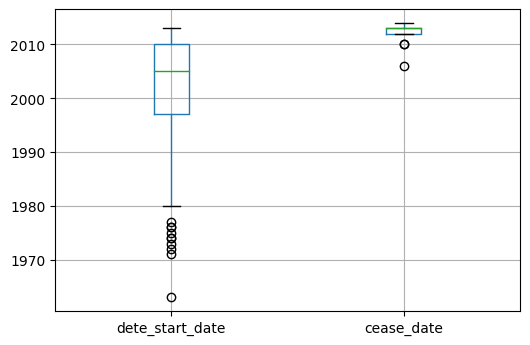

In [22]:
#Plot the values to visually see if any look off
boxplot = dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])

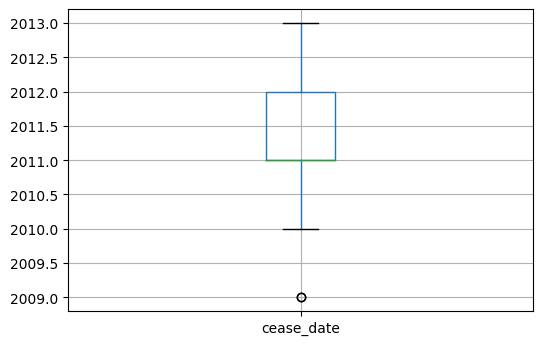

In [23]:
boxplot2 = tafe_resignations.boxplot(column=['cease_date'])

After extracting the year from the cease_date column in dete resignations, we explored the date columns for our two data sets. 

Start years range from 1963 - 2013 and end dates seem to run from 2006 - 2014, not too unusual. 

## Create a New Column

To reiterate, based on the above verification, we found out that there arent major issues with the years and the years in each dataframe dont span the same number of years.

Since our end goal is to explore exployees working time period, we need to explore length of time.

Tafe resignations already has a **service** column, renamed as **institute_service**. But to analyze both surveys, we need to create a **institute_service** column in dete resignations.

In [24]:
#Create a new column institute_service in dete_resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [25]:
#check new column
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

We now have a column to match institute service for Tafe and Dete. Looks like a majority of he values reside in 0-10 years of service, up to an employee who has given 49 years!

## ID Dissatisfied Employees

Now that we have an institute service column to analyze respondents by length of service, we will now ID any employees who resigned  because they were dissatisfied.

Below are the columns we'll use to categorize employees as 'dissatisfied' from each df. 

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
    
2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
If an employee indicated any of the above for resignation, we will mark as dissatisfied in a new column.
 
To create a new column, we will:

1. Convert values above from tafe_resignations columns as True, False or Nan
2. If True, add to dissatisfied column, using df.any() method

After changes, new column will contain just:
- True: person resigned because they were dissatisfied
- False: person resigned becayse other reason
- NaN: missing value 

In [26]:
#Lets view the values in the below columns
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [27]:
#Let's update the values so they contain True, False, NaN
#We will create a function to make the changes
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif (val == '-' or val == False): # add the 'value == False' clause so this cell can safely be run more than once
        return False
    else:
        return True 
    
#We will use df.applymap() to apply function to columns
tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[tafe_dissatisfaction_cols] = tafe_resignations[tafe_dissatisfaction_cols].applymap(update_vals)
#1st Check
tafe_resignations[tafe_dissatisfaction_cols].head(25)


,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [28]:
#Now we will use df.any() to creae a new column for dissatisfied
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_cols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [29]:
#then use df.copy() to create a copy of results and avoid
#SettingWithCopy Warning
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].head(25)

3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14     True
15    False
16      NaN
17     True
18      NaN
19    False
20     True
21    False
22    False
23    False
24    False
26     True
27    False
29    False
32    False
36    False
Name: dissatisfied, dtype: object

In [30]:
#Now let's add a dissatisfed column to dete resignations
dete_cols = ['job_dissatisfaction',
             'dissatisfaction_with_the_department',
             'physical_work_environment',
             'lack_of_recognition',
             'lack_of_job_security',
             'work_location',
             'employment_conditions',
             'work_life_balance',
             'workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [31]:
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].head(25)

3     False
5      True
8     False
9      True
11    False
12    False
14     True
16     True
20    False
21    False
22     True
23     True
25     True
27    False
33     True
34     True
37    False
39     True
40    False
41     True
42    False
43     True
48    False
50    False
51    False
Name: dissatisfied, dtype: bool

## Combine the Data

To quickly recap, we have renamed our columns, dropped unneeded data, verified the quality of data, created a new institute service column, cleanred the contributing factors columns and created a new column indicating if an employee resigned because they were dissatisfied in some way. 

Now let's combine our datasets. Our end goal is to aggregate the data according to institute service column.

In [32]:
#Lets add a column to each df to distinguish
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [33]:
#Now let's combine the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
#Check 1
combined.shape


(651, 53)

In [34]:
#Check 2 
combined['institute'].value_counts()

TAFE    340
DETE    311
Name: institute, dtype: int64

In [35]:
#Check 3
combined['dissatisfied'].value_counts()

False    403
True     240
Name: dissatisfied, dtype: int64

In [36]:
#Check 4
combined.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       

In [37]:
#Check 5
combined['separationtype'].value_counts()

Resignation                             340
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [38]:
#Now lets drop columns that were specific to one df and not shared in our newly combined df
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


We now have a new, updated dataset with 651 rows and 10 columns vs 53 columns.

## Clean the Service Column

Now we have a combined data, we still need to clean the institute_service column, as it contains values in different forms.

We will convert the numerical data in the institute_service, into categories, based on the following [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), based on career stage instead of age.

- New: < 3 years at company
- Experienced: 3-6 years at company
- Established: 7-10 years at company
- Veteran: 11+ years at company

In [39]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [40]:
#We will extract years of service, converting data to strings
combined['institute_service'] = combined['institute_service'].astype(str)


In [41]:
#Next to handle the the counts for multiple values
#will use the regex (\d+) to refer to digits
combined['institute_service'] = combined['institute_service'].str.extract(r'(\d+)').astype(float)


In [42]:
combined['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [43]:
#Next map each value of the career stage defintions
#firt create a function 
def stage_defin(val):
    if val < 3:
        return 'New'
    elif 3 <= val and val <= 6:
        return 'Experienced'
    elif 7 <= val and val <= 10:
        return 'Established'
    elif pd.isnull(val):
        pass
    else:
        return 'Veteran'

#use series.apply() to apply the function to the column and make a new one
combined['service_cat'] = combined['institute_service'].apply(stage_defin)
combined['service_cat'].value_counts(dropna=False)    

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis

Now let's finally do our analysis. Our **dissatisfied** column consists of booleans. Since df.pivot_table() treats booleans as integers (True = 1, False = 0), we can aggregate the column and caluculate the number of people in each group, the percentage of people in each group, etc.
 

In [44]:
#Use value counts to confirm # of True and False in dissatisfied
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

403 False values and 240 True values. We will fill the missing vlaues with False since it occurs most frequenly

In [45]:
combined['dissatisfied']=combined['dissatisfied'].fillna(False)
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [46]:
#Now use pivot table to calculate percentage of dissatisfied employees in each service_cat
pivot = combined.pivot_table(values='dissatisfied', index='service_cat', margins=True)
pivot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294
All,0.380107


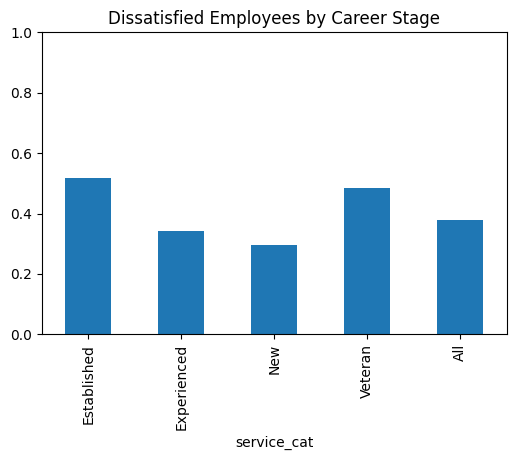

In [47]:
#Now let's plot the results
pivot.plot(kind='bar', title='Dissatisfied Employees by Career Stage', ylim=(0,1), legend=False)

Based on the above table, we can answer he first question of *Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?* 

We can see that employes who are relatively new to the company have less dissatisfaction upon resigning vs. those more established or veteran status in their careers, who experience more dissastisfaction. Looking at the average dissasifaction across the group who resigned at roughly 40%, that is not un-important and should be looked into for employee retention and morale. 


Now let's look at the age column and determine how many people in each age group resigned due to some kind of dissatisfaction.

In [48]:
combined['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

These age ranges seem to duplicate, which may have happened during combining the datasets - let's combine ranges

In [49]:
combined['age'] = combined['age'].astype(str)
combined['age'].value_counts()

51-55            71
nan              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [56]:
#Now let's replae the values with spaces to match the duplicates
replace = {'41  45':'41-45', '46  50':'46-50', '21  25':'21-25', '36  40':'36-40', '26  30':'26-30', '31  35':'31-35', '56 or older': '56-60'}
combined['age'] = combined['age'].replace(replace)
combined['age'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56-60            55
61 or older      23
nan              55
Name: age, dtype: int64

In [58]:
#Now pivot table
pivot_age = combined.pivot_table(index='age', values='dissatisfied')
pivot_age

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


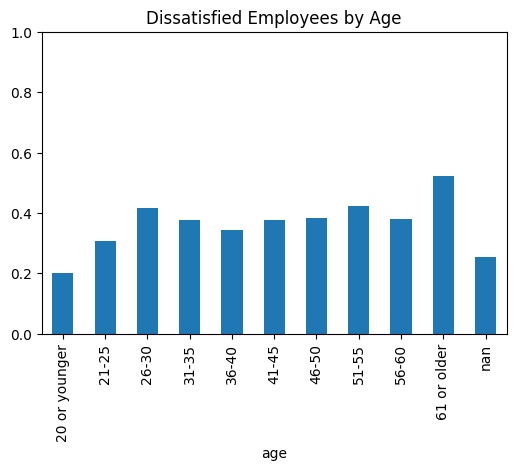

In [60]:
pivot_age.plot(kind='bar', title='Dissatisfied Employees by Age', ylim=(0,1), legend=False)

Looking at the distribution of age, it looks like those that are oldest resigned due to some level of dissatisfaction, followed by those in their late 20s/early 30s. 